# 将图片在指定图库中转化为马赛克图

In [1]:
import photomosaic as pm
import matplotlib.pyplot as plt
from skimage.io import imsave
from skimage.io import imread

In [26]:
image = imread('../singapore2.jpg')  # 选择要转换的图片

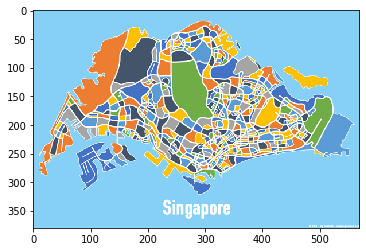

In [27]:
plt.imshow(image)

In [6]:
# Analyze the collection (the "pool") of images.
#pool = pm.make_pool('images/*/*.*')
pool = pm.make_pool('../Frontend/imgs/train/*.*')

analyzing pool: 100%|██████████| 4011/4011 [00:16<00:00, 238.59it/s]


In [2]:
# adapt_image = pm.adapt_to_pool(image, pool) # 将图片转化为适合图库的样子,但是实际上并不好

In [34]:
mos = pm.basic_mosaic(image, pool, (100,100)) # 第三个参数代表将大图分割的大小

drawing mosaic: 100%|██████████| 10000/10000 [00:02<00:00, 4251.89it/s]


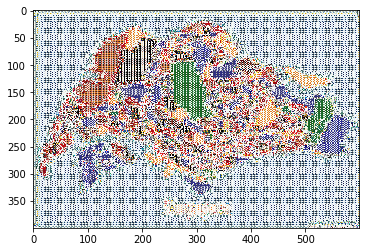

In [35]:
plt.imshow(mos)

In [36]:
imsave('../singapore_mosaic.png', mos) # 保存图片

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [37]:
import requests

In [39]:
b= requests.get('http://172.25.105.165:5000')

In [40]:
b

<Response [200]>